In [59]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'random' to generate random sample
import random

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

In [60]:
#Import the dataset

df = pd.read_csv('Drug safety and pharmacovigilance.csv')
df['Drug'] = df['Drug'].replace({'DrugY': 'Drug Y', 'drugX': 'Drug X', 'drugA': 'Drug A', 'drugC': 'Drug C', 'drugB': 'Drug B'})

In [61]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,Drug Y
1,47,M,LOW,HIGH,13.093,Drug C
2,47,M,LOW,HIGH,10.114,Drug C
3,28,F,NORMAL,HIGH,7.798,Drug X
4,61,F,LOW,HIGH,18.043,Drug Y


In [62]:
# Making a statistical summary of all numerical columns in the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [63]:
# Taking the value caunt of the gender of the patients in the dataset

df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

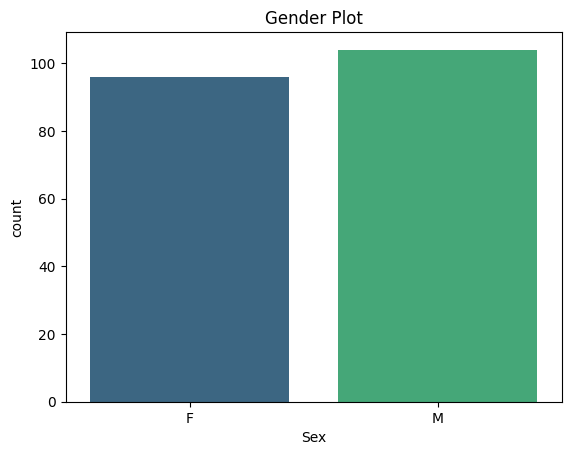

In [64]:
# Making a barplot of on the gender of the patients.

sns.countplot(data=df, x='Sex', palette='viridis')
plt.title('Gender Plot')
plt.show()

In [65]:
# Taking the value caunt of the Drug Types in the dataset.

df['Drug'].value_counts()

Drug Y    91
Drug X    54
Drug A    23
Drug C    16
Drug B    16
Name: Drug, dtype: int64

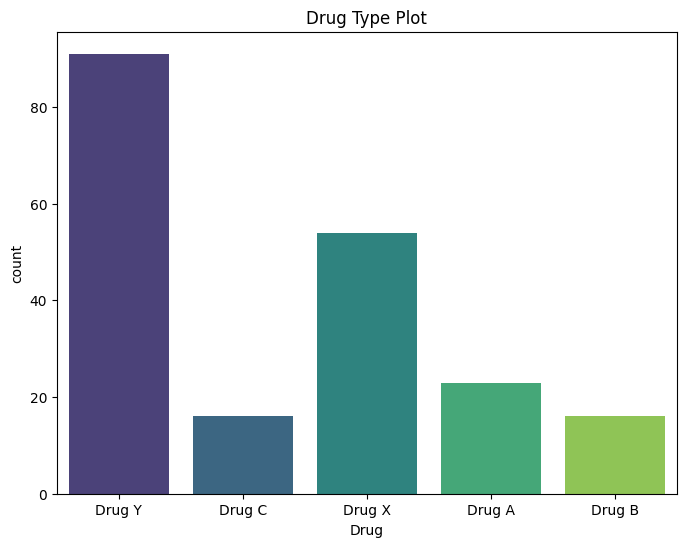

In [66]:
# Making a barplot of on the Drug Types in the dataset.

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Drug', palette='viridis')
plt.title('Drug Type Plot')
plt.show()

In [67]:
# Taking the value count of the Blood Pressure in the dataset.

df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

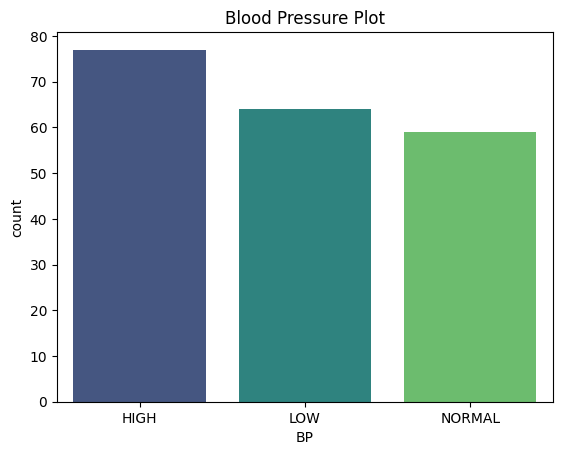

In [68]:
# Making a barplot of on the Blood Pressure in the dataset.

sns.countplot(data=df, x='BP', palette='viridis')
plt.title('Blood Pressure Plot')
plt.show()

In [69]:
# Taking the value count of the Cholesterol in the dataset.

df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

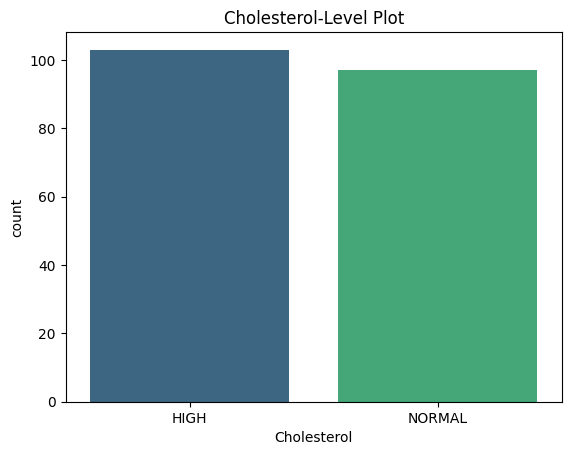

In [70]:
# Making a barplot of on the Cholesterol in the dataset.

sns.countplot(data=df, x='Cholesterol', palette='viridis')
plt.title('Cholesterol-Level Plot')
plt.show()

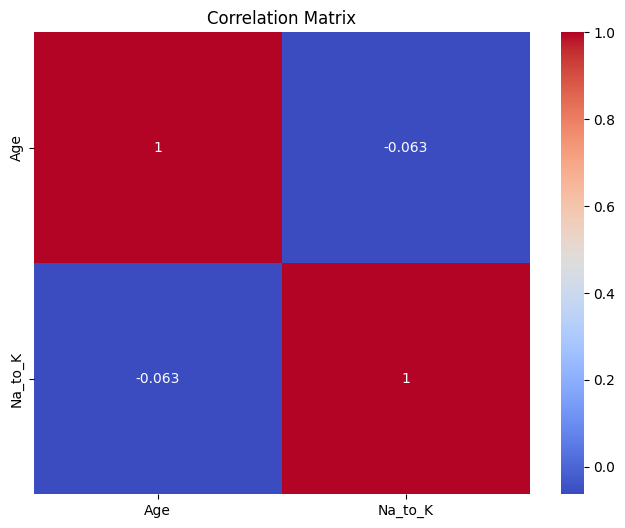

In [71]:
# Correlation between numerical features
corr_matrix = df[['Age', 'Na_to_K']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

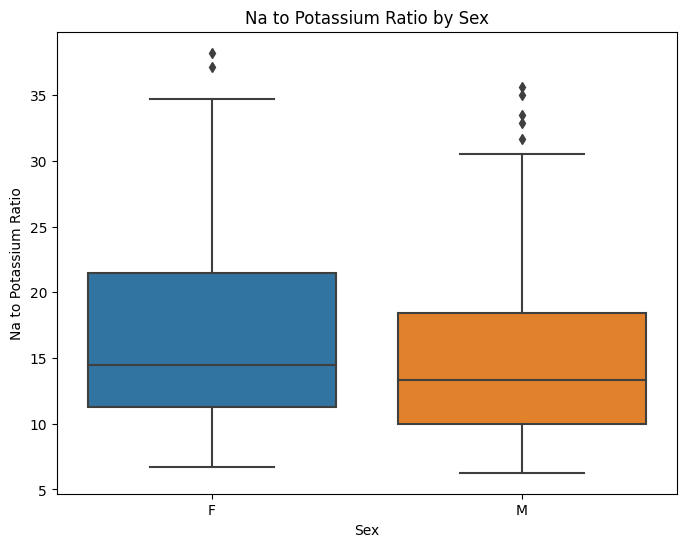

In [72]:
# Na to Potassium Ratio by Sex
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex', y='Na_to_K', data=df)
plt.title('Na to Potassium Ratio by Sex')
plt.xlabel('Sex')
plt.ylabel('Na to Potassium Ratio')
plt.show()

# Data Manipulation and Feature Transformation

In [73]:
# Defining the replacement mappings for multiple columns
replacements = {
    'Sex': {'M': 1, 'F': 0},
    'Cholesterol': {'HIGH': 1, 'NORMAL': 0},
    'BP': {'HIGH': 1, 'NORMAL': 0, 'LOW': 1},
}

# Creating a new DataFrame with the replacements applied
new_df = df.replace(replacements)

In [74]:

# Categorizing 'Age' into three bins based on quantiles
new_df['Age_Group'] = pd.qcut(new_df['Age'], q=[0, 0.25, 0.75, 1], labels=['<31', '31 to 58', '>58'])

# Categorizing 'Na_to_K' into three bins based on quantiles
new_df['Na_K_Ratio_Group'] = pd.qcut(new_df['Na_to_K'], q=[0, 0.25, 0.75, 1], labels=['<10.45', '>10.45 to <19.40', '>19.40'])

drop_columns = ['Age', 'Na_to_K']
new_df = new_df.drop(drop_columns, axis=1)

new_df.head()

,Sex,BP,Cholesterol,Drug,Age_Group,Na_K_Ratio_Group
0,0,1,1,Drug Y,<31,>19.40
1,1,1,1,Drug C,31 to 58,>10.45 to <19.40
2,1,1,1,Drug C,31 to 58,<10.45
3,0,0,1,Drug X,<31,<10.45
4,0,1,1,Drug Y,>58,>10.45 to <19.40


# Hypothesis Testing and Statistical Inference

In [75]:
import scipy.stats as ss
from scipy.stats import chi2_contingency

In [76]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [77]:
categorical_values = new_df[['Sex','BP','Drug','Cholesterol','Age_Group', 'Na_K_Ratio_Group']]

categorical_values.head(5)

,Sex,BP,Drug,Cholesterol,Age_Group,Na_K_Ratio_Group
0,0,1,Drug Y,1,<31,>19.40
1,1,1,Drug C,1,31 to 58,>10.45 to <19.40
2,1,1,Drug C,1,31 to 58,<10.45
3,0,0,Drug X,1,<31,<10.45
4,0,1,Drug Y,1,>58,>10.45 to <19.40


In [78]:
rows= []

for var1 in categorical_values:
  col = []
  for var2 in categorical_values :
    cramers =cramers_V(categorical_values[var1], categorical_values[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_cramer = pd.DataFrame(cramers_results, columns = categorical_values.columns, index =categorical_values.columns)

In [79]:
df_cramer

,Sex,BP,Drug,Cholesterol,Age_Group,Na_K_Ratio_Group
Sex,0.98,0.00,0.01,0.00,0.01,0.02
BP,0.00,0.98,0.30,0.02,0.01,0.03
Drug,0.01,0.30,1.00,0.10,0.07,0.26
Cholesterol,0.00,0.02,0.10,0.98,0.01,0.00
Age_Group,0.01,0.01,0.07,0.01,1.00,0.01
Na_K_Ratio_Group,0.02,0.03,0.26,0.00,0.01,1.00


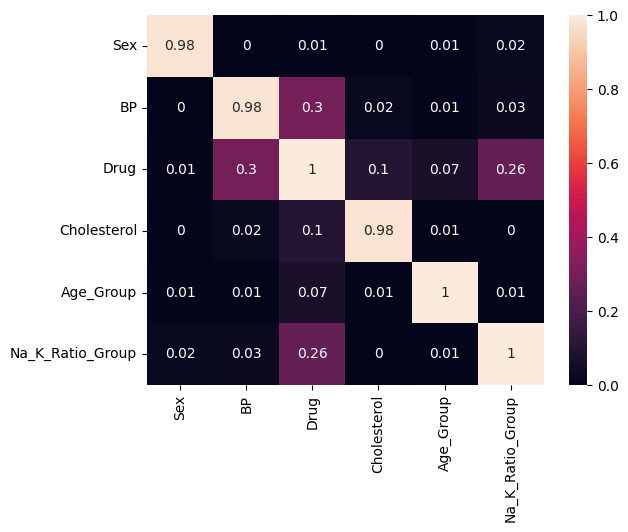

In [80]:
# generating 2-D 10x10 matrix of random numbers
# from 1 to 100
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
  
# setting the parameter values
annot = True
  
# plotting the heatmap
hm = sns.heatmap(data=df_cramer,
                annot=annot)
  
# displaying the plotted heatmap
plt.show()

In [81]:
new_df.head()

,Sex,BP,Cholesterol,Drug,Age_Group,Na_K_Ratio_Group
0,0,1,1,Drug Y,<31,>19.40
1,1,1,1,Drug C,31 to 58,>10.45 to <19.40
2,1,1,1,Drug C,31 to 58,<10.45
3,0,0,1,Drug X,<31,<10.45
4,0,1,1,Drug Y,>58,>10.45 to <19.40


## Running Chi-Square Test for Independence

In [82]:
# Creating contingency tables
bp_drug_table = pd.crosstab(new_df['BP'], new_df['Drug'])
bp_drug_table_t = pd.crosstab(new_df['BP'], new_df['Drug']).T
bp_drug_table

Drug,Drug A,Drug B,Drug C,Drug X,Drug Y
BP,,,,,
0,0,0,0,36,23
1,23,16,16,18,68


In [83]:
# Performing chi-square test of independence
bp_chi2, bp_p, bp_dof, bp_expected = chi2_contingency(bp_drug_table)

print(f"BP vs Drug p-value: {bp_p}")

BP vs Drug p-value: 3.4163844695928926e-12


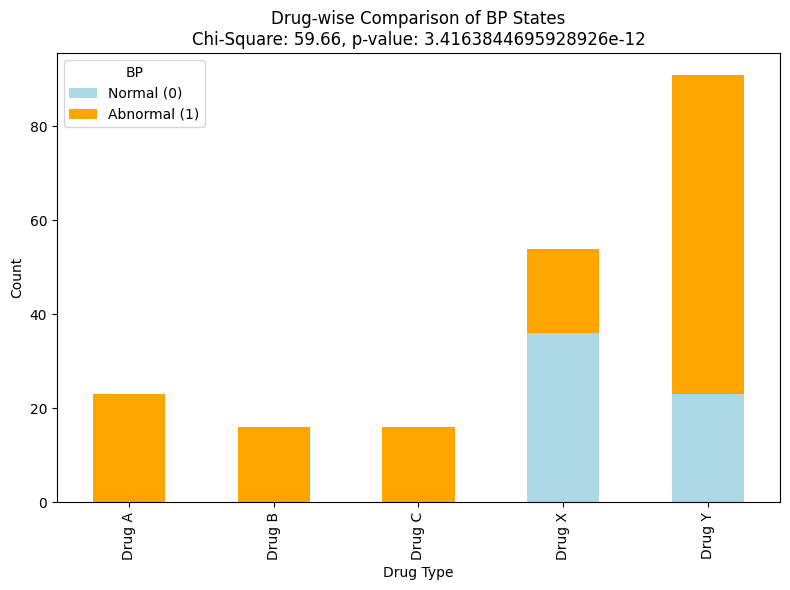

In [84]:
# Perform chi-square test
bp_chi2, bp_p, bp_dof, bp_expected = chi2_contingency(bp_drug_table)

# Plot a stacked bar chart
bp_drug_table_t.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], figsize=(8, 6))

# Annotate with chi-square statistics
plt.title(f'Drug-wise Comparison of BP States\nChi-Square: {bp_chi2:.2f}, p-value: {bp_p}')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.legend(title='BP', labels=['Normal (0)', 'Abnormal (1)'])

# Show the plot
plt.tight_layout()
plt.show()

In [85]:
chol_drug_table = pd.crosstab(new_df['Cholesterol'], new_df['Drug'])
chol_drug_table_t = pd.crosstab(new_df['Cholesterol'], new_df['Drug']).T

chol_drug_table

Drug,Drug A,Drug B,Drug C,Drug X,Drug Y
Cholesterol,,,,,
0,11,8,0,34,44
1,12,8,16,20,47


In [86]:
chol_chi2, chol_p, chol_dof, chol_expected = chi2_contingency(chol_drug_table)

print(f"Cholesterol vs Drug p-value: {chol_p}")

Cholesterol vs Drug p-value: 0.0005962588389856504


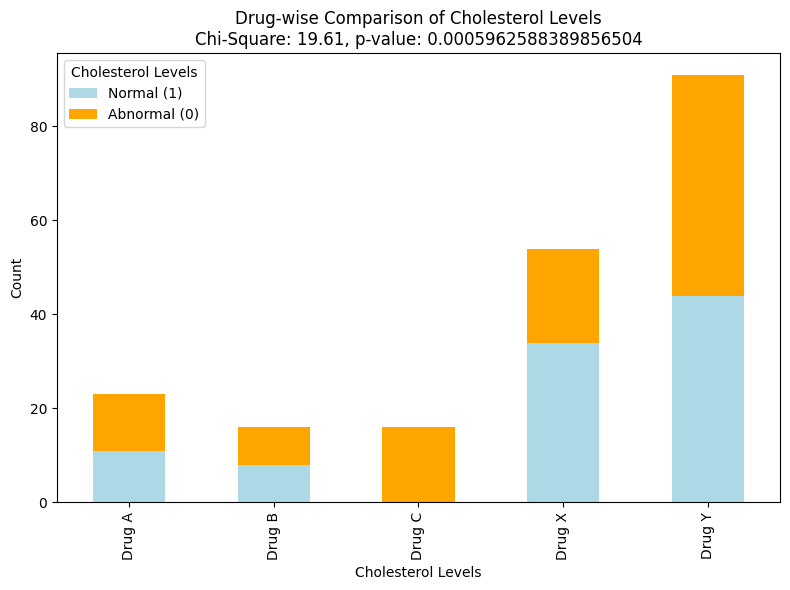

In [87]:
# Perform chi-square test
chol_chi2, chol_p, chol_dof, chol_expected = chi2_contingency(chol_drug_table)

# Plot a stacked bar chart
chol_drug_table_t.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], figsize=(8, 6))

# Annotate with chi-square statistics
plt.title(f'Drug-wise Comparison of Cholesterol Levels\nChi-Square: {chol_chi2:.2f}, p-value: {chol_p}')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Count')
plt.legend(title='Cholesterol Levels', labels=['Normal (1)', 'Abnormal (0)'])

# Show the plot
plt.tight_layout()
plt.show()

In [88]:
age_gr_drug_table = pd.crosstab(new_df['Age_Group'], new_df['Drug'])
age_gr_drug_table_t = pd.crosstab(new_df['Age_Group'], new_df['Drug']).T
age_gr_drug_table

Drug,Drug A,Drug B,Drug C,Drug X,Drug Y
Age_Group,,,,,
<31,8,0,5,13,26
31 to 58,15,5,8,28,44
>58,0,11,3,13,21


In [89]:
agr_chi2, agr_p, agr_dof, agr_expected = chi2_contingency(age_gr_drug_table)

print(f"Age_Group vs Drug p-value: {agr_p}")

Age_Group vs Drug p-value: 0.000801579802393098


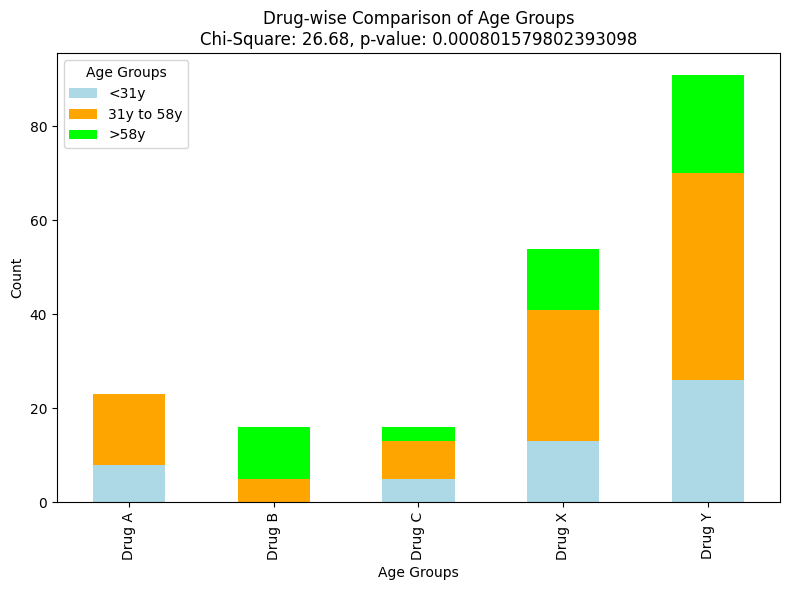

In [90]:
# Perform chi-square test
agr_chi2, agr_p, agr_dof, agr_expected = chi2_contingency(age_gr_drug_table)

# Plot a stacked bar chart
age_gr_drug_table_t.plot(kind='bar', stacked=True, color=['lightblue', 'orange', 'lime'], figsize=(8, 6))

# Annotate with chi-square statistics
plt.title(f'Drug-wise Comparison of Age Groups\nChi-Square: {agr_chi2:.2f}, p-value: {agr_p}')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.legend(title='Age Groups', labels=['<31y', '31y to 58y', '>58y'])

# Show the plot
plt.tight_layout()
plt.show()

In [91]:
na_k_drug_table = pd.crosstab(new_df['Na_K_Ratio_Group'], new_df['Drug'])
na_k_drug_table_t = pd.crosstab(new_df['Na_K_Ratio_Group'], new_df['Drug']).T
na_k_drug_table

Drug,Drug A,Drug B,Drug C,Drug X,Drug Y
Na_K_Ratio_Group,,,,,
<10.45,9,6,8,27,0
>10.45 to <19.40,14,10,8,27,41
>19.40,0,0,0,0,50


In [92]:
na_k_chi2, na_k_p, na_k_dof, na_K_expected = chi2_contingency(na_k_drug_table)

print(f"Na_K_Ratio_Group vs Drug p-value: {na_k_p}")

Na_K_Ratio_Group vs Drug p-value: 5.2051737372434e-19


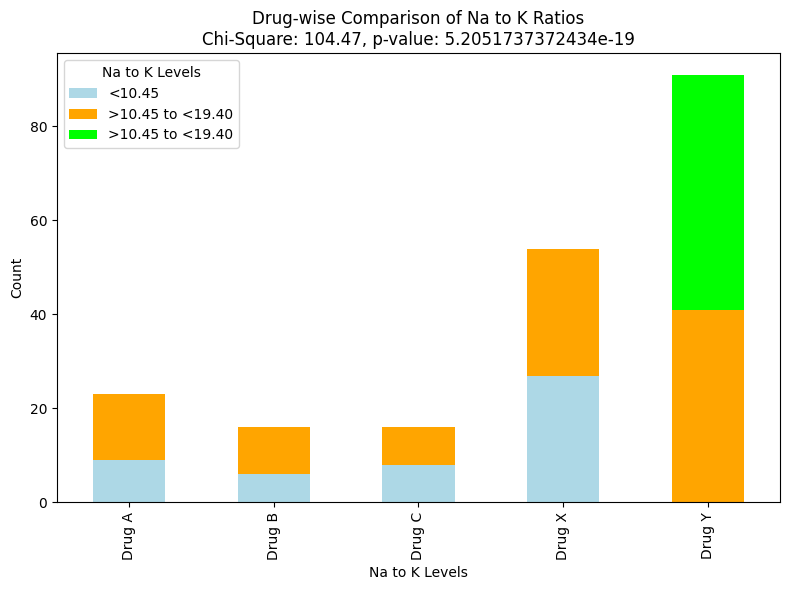

In [93]:
# Perform chi-square test
na_k_chi2, na_k_p, na_k_dof, na_K_expected = chi2_contingency(na_k_drug_table)

# Plot a stacked bar chart
na_k_drug_table_t.plot(kind='bar', stacked=True, color=['lightblue', 'orange', 'lime'], figsize=(8, 6))

# Annotate with chi-square statistics
plt.title(f'Drug-wise Comparison of Na to K Ratios\nChi-Square: {na_k_chi2:.2f}, p-value: {na_k_p}')
plt.xlabel('Na to K Levels')
plt.ylabel('Count')
plt.legend(title='Na to K Levels', labels=['<10.45', '>10.45 to <19.40', '>10.45 to <19.40'])

# Show the plot
plt.tight_layout()
plt.show()

# Model Selection: Classification Problem

In [106]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances


In [98]:
# Label encoding for categorical variables
le_bp = LabelEncoder()
le_cholesterol = LabelEncoder()
le_drug = LabelEncoder()

df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_cholesterol.fit_transform(df['Cholesterol'])
df['Drug'] = le_drug.fit_transform(df['Drug'])

# Split features and labels
X = df[['Age', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 16)
    
    # Create the classifier with the suggested hyperparameters
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Split the data (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Output the best parameters
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2024-09-11 20:33:25,220] A new study created in memory with name: no-name-645aba60-239e-4849-9b1f-86be2acf3428
[I 2024-09-11 20:33:26,439] Trial 0 finished with value: 0.9 and parameters: {'n_estimators': 285, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9.
[I 2024-09-11 20:33:26,953] Trial 1 finished with value: 0.875 and parameters: {'n_estimators': 132, 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9.
[I 2024-09-11 20:33:27,676] Trial 2 finished with value: 0.875 and parameters: {'n_estimators': 178, 'max_depth': 20, 'min_samples_split': 12, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.9.
[I 2024-09-11 20:33:28,071] Trial 3 finished with value: 0.875 and parameters: {'n_estimators': 95, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.9.
[I 2024-09-11 20:33:28,702] Trial 4 finished with value: 0.875 and parameters: {'n_estimator

[I 2024-09-11 20:34:04,360] Trial 41 finished with value: 1.0 and parameters: {'n_estimators': 264, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 10 with value: 1.0.
[I 2024-09-11 20:34:05,460] Trial 42 finished with value: 1.0 and parameters: {'n_estimators': 255, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 10 with value: 1.0.
[I 2024-09-11 20:34:06,382] Trial 43 finished with value: 1.0 and parameters: {'n_estimators': 216, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 10 with value: 1.0.
[I 2024-09-11 20:34:07,627] Trial 44 finished with value: 1.0 and parameters: {'n_estimators': 282, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 10 with value: 1.0.
[I 2024-09-11 20:34:08,626] Trial 45 finished with value: 1.0 and parameters: {'n_estimators': 234, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 10 with value: 1.0.
[I 2024-

Best hyperparameters: {'n_estimators': 225, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 1}
Best accuracy: 1.0


In [102]:
# Train the final model with the best hyperparameters
best_params = study.best_params

clf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

clf_best.fit(X_train, y_train)

# Make predictions with the final model
y_pred_best = clf_best.predict(X_test)

# Evaluate the final model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Final model accuracy with tuned hyperparameters:", accuracy_best)


Final model accuracy with tuned hyperparameters: 1.0


In [104]:
# Generate predictions with the trained model
y_pred_best = clf_best.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)


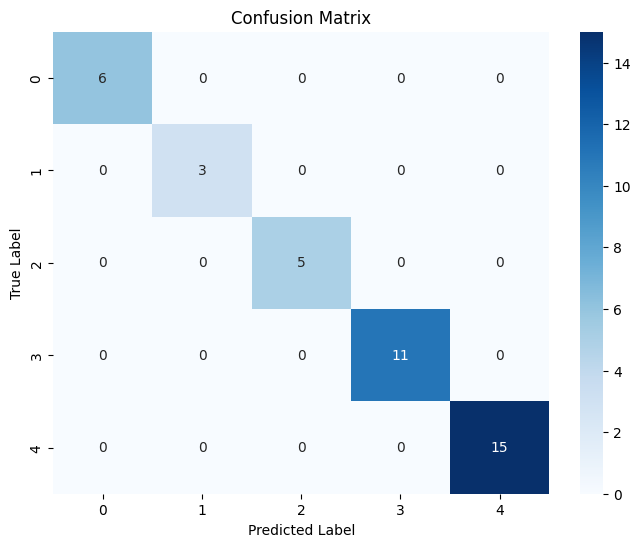

In [105]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


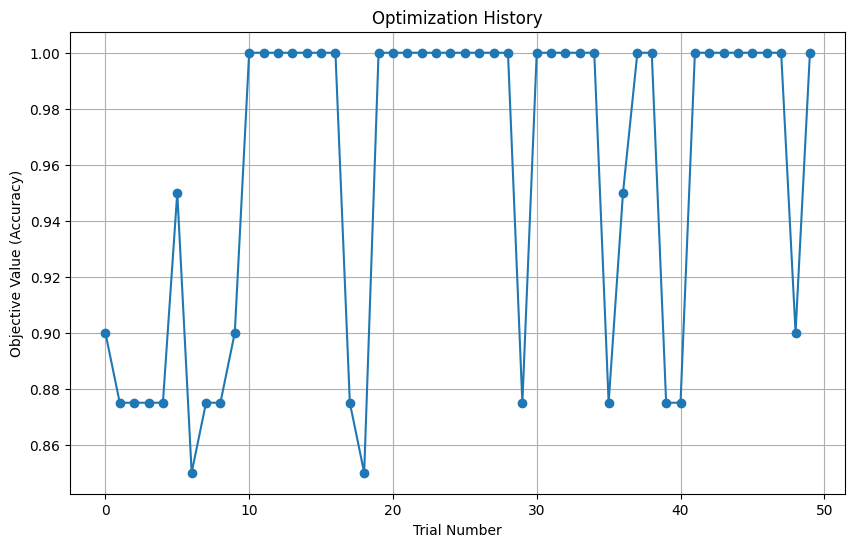

In [113]:
# Extract the data for optimization history
trials = study.trials_dataframe()

# Plot optimization history using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(trials['number'], trials['value'], marker='o')
plt.title('Optimization History')
plt.xlabel('Trial Number')
plt.ylabel('Objective Value (Accuracy)')
plt.grid(True)
plt.savefig('optimization_history_matplotlib.png')
plt.show()

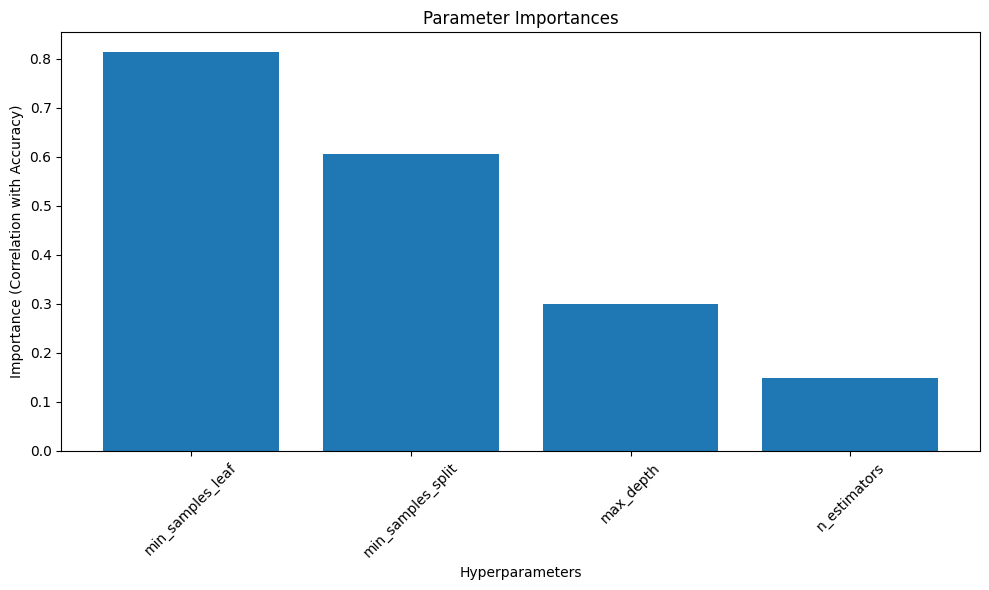

In [116]:
# Extract trial parameters and values
params = trials.filter(like='params_', axis=1)
objective = trials['value']

# Compute parameter importances (simple correlation for illustration purposes)
importances = params.apply(lambda x: np.abs(np.corrcoef(x, objective)[0, 1]))

# Sort importances in descending order
importances = importances.sort_values(ascending=False)

# Plot parameter importances using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(importances.index.str.replace('params_', ''), importances.values)
plt.title('Parameter Importances')
plt.xlabel('Hyperparameters')
plt.ylabel('Importance (Correlation with Accuracy)')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.savefig('param_importances_matplotlib.png')
plt.show()

In [117]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from optuna import Trial

# Define the objective function for Optuna
def objective(trial: Trial):
    # Hyperparameter tuning using trial suggestions
    param = {
        'objective': 'multi:softmax',  # multi-class classification
        'num_class': 5,  # number of drug classes
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }
    
    # Train XGBoost model with suggested hyperparameters
    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy


In [118]:
import optuna

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Output the best hyperparameters and accuracy
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2024-09-11 22:03:41,728] A new study created in memory with name: no-name-f7041f05-083d-4e8a-b716-e49ceb56a5fa
[I 2024-09-11 22:03:42,092] Trial 0 finished with value: 1.0 and parameters: {'max_depth': 4, 'learning_rate': 0.26667503086186845, 'n_estimators': 562, 'subsample': 0.7292578476921213, 'colsample_bytree': 0.6612879296883494, 'gamma': 3.317172690616127e-07, 'min_child_weight': 1}. Best is trial 0 with value: 1.0.
[I 2024-09-11 22:03:42,361] Trial 1 finished with value: 0.925 and parameters: {'max_depth': 5, 'learning_rate': 0.017409146749478854, 'n_estimators': 394, 'subsample': 0.7012488680031634, 'colsample_bytree': 0.5305412235282295, 'gamma': 3.772336997548675e-08, 'min_child_weight': 6}. Best is trial 0 with value: 1.0.
[I 2024-09-11 22:03:42,905] Trial 2 finished with value: 0.95 and parameters: {'max_depth': 4, 'learning_rate': 0.021352648171822586, 'n_estimators': 998, 'subsample': 0.6075319051732797, 'colsample_bytree': 0.6787306205216447, 'gamma': 0.03952562096748

[I 2024-09-11 22:03:50,256] Trial 26 finished with value: 0.975 and parameters: {'max_depth': 4, 'learning_rate': 0.24778440037608038, 'n_estimators': 505, 'subsample': 0.9245836082189685, 'colsample_bytree': 0.643230675440022, 'gamma': 0.5996527905413941, 'min_child_weight': 7}. Best is trial 0 with value: 1.0.
[I 2024-09-11 22:03:50,562] Trial 27 finished with value: 1.0 and parameters: {'max_depth': 3, 'learning_rate': 0.13188655348099942, 'n_estimators': 454, 'subsample': 0.8554319752995839, 'colsample_bytree': 0.5261353083234055, 'gamma': 5.547443593653651e-08, 'min_child_weight': 3}. Best is trial 0 with value: 1.0.
[I 2024-09-11 22:03:50,782] Trial 28 finished with value: 1.0 and parameters: {'max_depth': 6, 'learning_rate': 0.19753321768128024, 'n_estimators': 235, 'subsample': 0.7153718914388225, 'colsample_bytree': 0.5900049262355174, 'gamma': 0.002750596021803086, 'min_child_weight': 5}. Best is trial 0 with value: 1.0.
[I 2024-09-11 22:03:51,045] Trial 29 finished with valu

Best hyperparameters: {'max_depth': 4, 'learning_rate': 0.26667503086186845, 'n_estimators': 562, 'subsample': 0.7292578476921213, 'colsample_bytree': 0.6612879296883494, 'gamma': 3.317172690616127e-07, 'min_child_weight': 1}
Best accuracy: 1.0


In [119]:
# Use the best hyperparameters from Optuna
best_params = study.best_params

final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

# Make predictions
y_pred_final = final_model.predict(X_test)

# Evaluate the final model
final_accuracy = accuracy_score(y_test, y_pred_final)
print("Final model accuracy:", final_accuracy)


Final model accuracy: 1.0


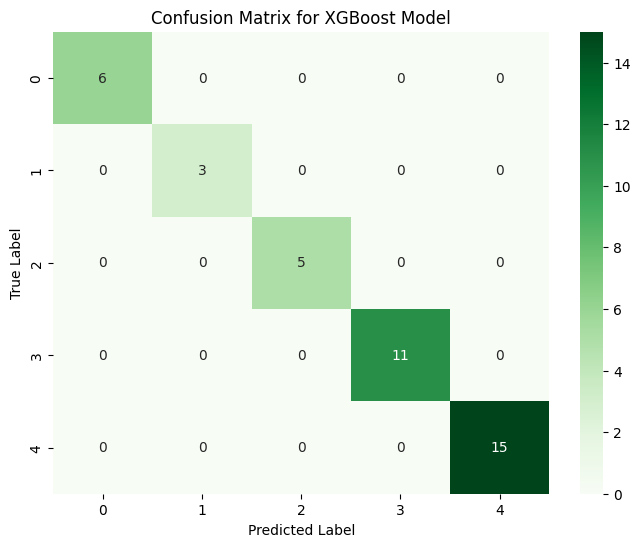

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
